06 - 01 - 2024
# Movie Data Hackathon

In [25]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [6]:
links = pd.read_csv("links.csv")
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [7]:
movies = pd.read_csv("movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [8]:
ratings = pd.read_csv("ratings.csv")
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [9]:
tags = pd.read_csv("tags.csv")
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


1. Download the data from the above link. How many ".csv" files are available in the dataset?

In [ ]:
4

2. What is the shape of "movies.csv"?

In [10]:
movies.shape

(9742, 3)

3. What is the shape of "ratings.csv"?

In [11]:
ratings.shape

(100836, 4)

4. How many unique "userId" are available in "ratings.csv"?

In [12]:
users = ratings['userId'].value_counts()
users

414    2698
599    2478
474    2108
448    1864
274    1346
       ... 
442      20
569      20
320      20
576      20
53       20
Name: userId, Length: 610, dtype: int64

5. Which movie has recieved maximum number of user ratings?

In [13]:
movies.merge(ratings,on="movieId")["title"].value_counts().reset_index()

,index,title
0,Forrest Gump (1994),329
1,"Shawshank Redemption, The (1994)",317
2,Pulp Fiction (1994),307
3,"Silence of the Lambs, The (1991)",279
4,"Matrix, The (1999)",278
...,...,...
9714,We're Back! A Dinosaur's Story (1993),1
9715,American Hardcore (2006),1
9716,Shanghai Surprise (1986),1
9717,Let's Get Harry (1986),1


6. Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [20]:
movies_df = pd.read_csv('movies.csv')  # Replace with the actual filename

tags_df = pd.read_csv('tags.csv')  # Replace with the actual filename

merged_df = pd.merge(movies_df, tags_df, on='movieId', how='inner')

movie_title = "Matrix, The (1999)"

movie_tags = merged_df[merged_df['title'] == movie_title]['tag']

print(f"Tags for '{movie_title}':")
for tag in movie_tags:
    print(tag)

Tags for 'Matrix, The (1999)':
martial arts
sci-fi
alternate universe
philosophy
post apocalyptic


7. What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [22]:
movies_and_ratings = pd.merge(movies, ratings, on='movieId', how='inner')
movies_and_ratings

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [24]:
movie_title = "Terminator 2: Judgment Day (1991)"

movie_ratings = movies_and_ratings[movies_and_ratings['title'] == movie_title]['rating']

if not movie_ratings.empty:

    average_rating = movie_ratings.mean()
    print(f"The average user rating for '{movie_title}' is: {average_rating:.2f}")
else:
    print(f"No ratings found for '{movie_title}'.")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


8. How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

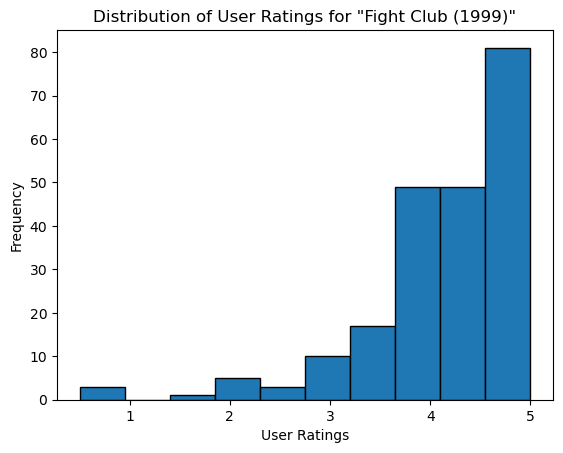

In [27]:
movie_title = "Fight Club (1999)"

movie_ratings = movies_and_ratings[movies_and_ratings['title'] == movie_title]['rating']

if not movie_ratings.empty:
    # Plot the histogram
    plt.hist(movie_ratings, bins=10, edgecolor='black')
    plt.title(f'Distribution of User Ratings for "{movie_title}"')
    plt.xlabel('User Ratings')
    plt.ylabel('Frequency')
    plt.show()
else:
    print(f"No ratings found for '{movie_title}'.")

🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

9. Which movie is the most popular based on  average user ratings?

In [29]:
ratings_df = pd.read_csv('ratings.csv')  

grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()

grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

In [30]:
movies_df = pd.read_csv('movies.csv')  

merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

In [31]:
filtered_df = merged_df[merged_df['rating_count'] > 50]

In [40]:
average_ratings = filtered_df.groupby('title')['rating_mean'].mean()

most_popular_movie = average_ratings.idxmax()
highest_average_rating = average_ratings.max()

print(f"The most popular movie based on average user ratings is '{most_popular_movie}' "
      f"with an average rating of {highest_average_rating:.2f}")

The most popular movie based on average user ratings is 'Shawshank Redemption, The (1994)' with an average rating of 4.43


In [ ]:
10. Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [41]:
top_5_popular_movies = filtered_df.sort_values(by='rating_count', ascending=False).head(5)

print("Top 5 Popular Movies Based on Number of User Ratings:")
for title in top_5_popular_movies['title']:
    print(title)

Top 5 Popular Movies Based on Number of User Ratings:
Forrest Gump (1994)
Shawshank Redemption, The (1994)
Pulp Fiction (1994)
Silence of the Lambs, The (1991)
Matrix, The (1999)


In [ ]:
11. Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [42]:
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)

third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]['title']

print(f"The third most popular Sci-Fi movie based on the number of user ratings is: {third_most_popular_sci_fi_movie}")

The third most popular Sci-Fi movie based on the number of user ratings is: Jurassic Park (1993)


🟢 IMPORTANT NOTE 2 🟢
You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

If you are unable to write the webscraping script yourself, you can request the same by commenting LinkedIn Post.

12. Mention the movieId of the movie which has the highest IMDB rating.

In [43]:
! pip install beautifulsoup4 requests

In [96]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [110]:
filtered_df = filtered_df.merge(links,on="movieId",how="inner")

In [112]:
import requests
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find('span', attrs={'class' : 'sc-bde20123-1 cMEQkK'})
    return imdb_rating.text if imdb_rating else np.nan

rating_dict = dict()
imdbId = []
ratings = []

for each in filtered_df['imdbId']:
    rating = scrapper(each)
    imdbId.append(each)
    ratings.append(rating)
    
    rating_dict = {'imdbId' : imdbId, 'ratings' : ratings}

In [114]:
mdf = filtered_df.merge(pd.DataFrame(rating_dict),on="imdbId",how="inner")

In [115]:
mdf.sort_values(by="ratings",ascending=False)

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId,ratings
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,278.0,9.3
117,858,"Godfather, The (1972)",Crime|Drama,192,4.289062,68646,238.0,9.2
146,1203,12 Angry Men (1957),Drama,57,4.149123,50083,389.0,9.0
364,7153,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185,4.118919,167260,122.0,9.0
156,1221,"Godfather: Part II, The (1974)",Crime|Drama,129,4.259690,71562,240.0,9.0
...,...,...,...,...,...,...,...,...
70,420,Beverly Hills Cop III (1994),Action|Comedy|Crime|Thriller,59,2.720339,109254,306.0,5.5
28,153,Batman Forever (1995),Action|Adventure|Comedy|Crime,137,2.916058,112462,414.0,5.4
73,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635,106598,9612.0,5.4
30,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193,112715,10329.0,5.3


In [ ]:
13. Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [116]:
mdf[mdf["genres"].str.contains("Sci-Fi")].sort_values(by="ratings",ascending=False)

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId,ratings
424,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434,1375666,27205.0,8.8
248,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446,133093,603.0,8.7
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
140,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640,80684,1891.0,8.7
44,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076,76759,11.0,8.6
...,...,...,...,...,...,...,...,...
36,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355,113492,9482.0,5.6
35,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,113481,9886.0,5.6
73,435,Coneheads (1993),Comedy|Sci-Fi,63,2.420635,106598,9612.0,5.4
30,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193,112715,10329.0,5.3
